In [1]:
#Libraries initialization
import numpy as np
import matplotlib.pyplot as plt
import random as r
import networkx as nx
import scipy.sparse as sp
from collections import defaultdict  
import timeit 
import math

In [2]:
#TASK 1
#Adjacency matrix initialization
matrix=np.zeros((100, 100))
n = 500

while n > 0:
    i = r.randint(0,99)
    j = r.randint(0,99)
    if i != j and matrix[i,j] != 1:
        numb = r.randint(1,100)
        matrix[i,j]=numb
        matrix[j,i]=numb
        n -= 1

print(matrix)

[[ 0.  0.  0. ...  0.  0. 44.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [44.  0.  0. ...  0.  0.  0.]]


In [3]:
#Adjacency matrix to adjacency list
adjlist = defaultdict(list)
edges = set()
for i, v in enumerate(matrix, 1):
    for j, u in enumerate(v, 1):
        if u != 0 and frozenset([i, j]) not in edges:
            edges.add(frozenset([i, j]))
            adjlist[i].append(j)
print (adjlist)

defaultdict(<class 'list'>, {1: [12, 17, 25, 27, 29, 31, 33, 45, 64, 71, 81, 88, 92, 100], 2: [26, 28, 33, 43, 45, 52, 64, 81, 86, 88, 90], 3: [12, 24, 27, 44, 62, 63, 64, 75, 86], 4: [35, 36, 39, 44, 56, 64, 66, 82, 83, 96], 5: [8, 15, 16, 23, 28, 62, 65, 74, 83, 91], 6: [27, 32, 33, 34, 42, 49, 55, 89, 92], 7: [12, 14, 24, 97], 8: [20, 22, 36, 38, 41, 46, 51, 52, 60, 93, 99], 9: [39, 72, 84, 85], 10: [18, 19, 47, 50, 60, 67, 83], 11: [21, 30, 67, 83], 12: [16, 56, 64, 66, 74, 83, 98], 13: [19, 26, 29, 38, 40, 41, 44, 52, 59, 65, 69, 71, 74, 75, 89, 98], 14: [27, 48, 51, 61, 64, 77, 82, 94], 15: [25, 34, 38, 52, 53, 55, 64, 87, 97], 16: [18, 20, 23, 45, 46, 58, 66, 79, 98], 17: [25, 26, 34, 35, 40, 57], 18: [35, 70, 72, 77, 93], 19: [23, 34, 38, 41, 44, 60, 61, 74, 80, 81], 20: [51, 64, 76, 83, 86, 95], 21: [24, 34, 39, 50, 53, 54, 65, 69, 91], 22: [29, 44, 58, 63, 93, 94, 100], 23: [28, 29, 55, 58, 63, 66, 71, 75, 95], 24: [48, 51, 62, 63, 70, 74, 78, 88, 90, 92, 95, 100], 25: [31, 3

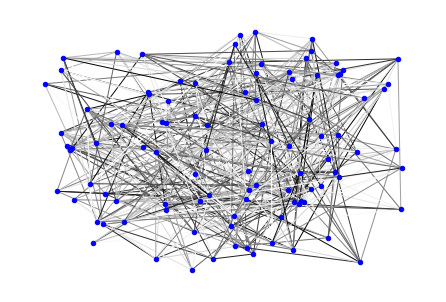

In [4]:
#Graph parameters
def get_matrix_triad(coo_matrix , data=False):
	if not sp.isspmatrix_coo(coo_matrix):
		coo_matrix = sp.coo_matrix(coo_matrix)
	temp = np.vstack((coo_matrix.row , coo_matrix.col , coo_matrix.data)).transpose()
	return temp.tolist()
edags = get_matrix_triad(matrix)

#Graph visualization
G = nx.Graph()
H = nx.path_graph(matrix.shape[0])
G.add_nodes_from(H)
G.add_weighted_edges_from(edags)
colors = np.arange(matrix.shape[0])
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G,pos=nx.random_layout(G),node_color='b', node_size = 20, edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.Greys)
plt.show()

In [5]:
b = r.randint(0,99)

rez1 = 0
rez2 = 0 
for _ in range(0, 10):
    t1 = 0
    t2 = 0
    start1 = timeit.default_timer()
    nx.single_source_dijkstra(G, b)
    end1 = timeit.default_timer()
    start2 = timeit.default_timer()
    nx.single_source_bellman_ford(G, b)
    end2 = timeit.default_timer()
    t1 = end1 - start1
    t2 = end2 - start2
    rez1 += t1
    rez2 += t2
rez1 = rez1/10
rez2 = rez2/10

print('Dijkstra method avg time= ', rez1)
print('Bellman ford avg time= ', rez2)
print('Coefficient (Bf / D)', rez2 / rez1)

Dijkstra method avg time=  0.0005318600004102336
Bellman ford avg time=  0.0015098200001375517
Coefficient (Bf / D) 2.8387545575395765


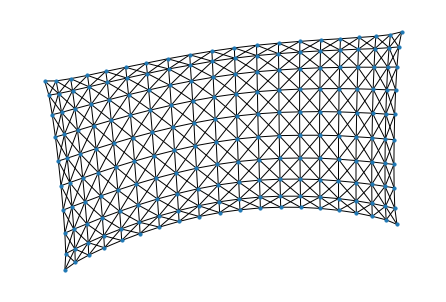

Obstacle cells [(6, 10), (1, 15), (5, 14), (3, 8), (0, 1), (6, 16), (4, 1), (3, 15), (7, 10), (9, 0), (5, 7), (0, 7), (8, 12), (9, 3), (5, 8), (0, 0), (9, 19), (4, 3), (2, 3), (9, 18), (6, 19), (1, 9), (1, 7), (9, 14), (3, 0), (7, 14), (1, 1), (4, 7), (2, 13), (3, 12), (3, 6), (5, 18), (9, 8), (6, 4), (8, 14), (1, 13), (9, 16), (6, 18), (4, 9), (7, 2)]


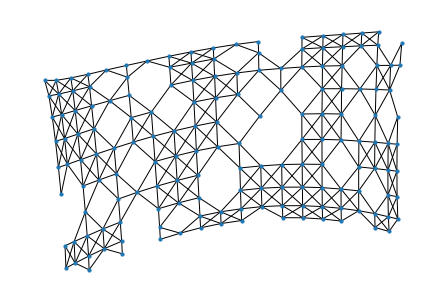

In [6]:

def heuristic(point1, point2):
    h = math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)
    return h

G = nx.grid_2d_graph(10, 20) 

for edge in G.edges:
    G.edges[edge]['weight'] = 1
    
G.add_edges_from([
    ((x, y), (x+1, y+1))
    for x in range(9)
    for y in range(19)
] + [
    ((x+1, y), (x, y+1))
    for x in range(9)
    for y in range(19)
], weight=1.4)

pos = nx.spring_layout(G, iterations=1000, seed=41)
nx.draw(G, pos, node_size=10)
plt.show()

# Obstacle cells
removed = []
while (len(removed) < 40):
    point = (r.randint(0,9), r.randint(0,19))
    if point not in removed:
        removed.append(point)

G.remove_nodes_from(removed)
print("Obstacle cells", removed)

nx.draw(G, pos, node_size=10)
plt.show()

In [20]:
i = 0
all_pathes = []
while i < 5:
    while 1:
        point1 = (r.randint(0, 9), r.randint(0, 19))
        point2 = (r.randint(0, 9), r.randint(0, 19))
        if (point1 not in removed) and (point2 not in removed):
            break
    print("from ", point1, "to", point2)
    path = nx.astar_path(G, point1, point2, heuristic)
    all_pathes.append(path)
    print(" path: ", path)
    i += 1

from  (5, 2) to (2, 16)
 path:  [(5, 2), (5, 3), (4, 4), (3, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (3, 13), (3, 14), (2, 15), (2, 16)]
from  (4, 6) to (4, 2)
 path:  [(4, 6), (4, 5), (4, 4), (3, 3), (4, 2)]
from  (7, 1) to (1, 16)
 path:  [(7, 1), (6, 2), (6, 3), (5, 4), (5, 5), (4, 6), (3, 7), (2, 8), (2, 9), (2, 10), (2, 11), (1, 12), (0, 13), (0, 14), (0, 15), (1, 16)]
from  (3, 16) to (5, 2)
 path:  [(3, 16), (4, 15), (4, 14), (4, 13), (5, 12), (5, 11), (5, 10), (5, 9), (6, 8), (6, 7), (6, 6), (6, 5), (5, 4), (5, 3), (5, 2)]
from  (9, 15) to (6, 11)
 path:  [(9, 15), (8, 15), (7, 15), (6, 14), (6, 13), (6, 12), (6, 11)]


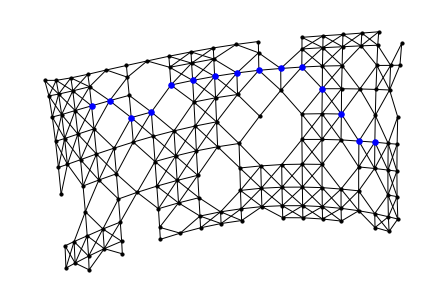

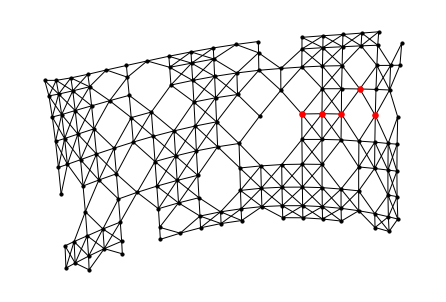

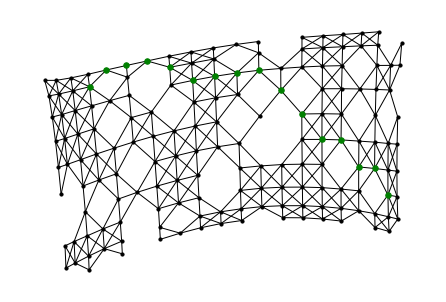

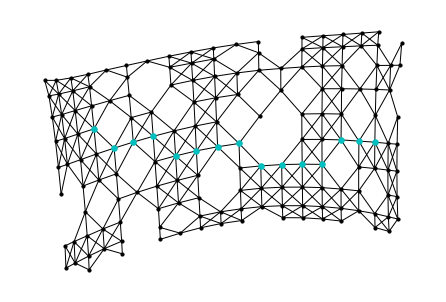

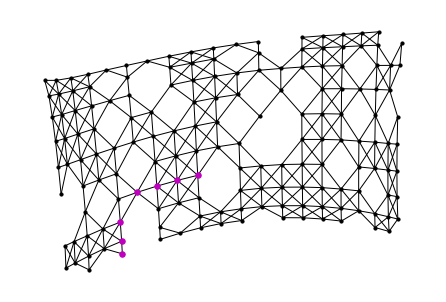

In [62]:
nx.draw(G, pos, node_size=10, node_color='k')
nx.draw_networkx_nodes(G, pos, nodelist=all_pathes[0], node_color='b', node_size=30)
plt.show()
nx.draw(G, pos, node_size=10, node_color='k')
nx.draw_networkx_nodes(G, pos, nodelist=all_pathes[1], node_color='r', node_size=30)
plt.show()
nx.draw(G, pos, node_size=10, node_color='k')
nx.draw_networkx_nodes(G, pos, nodelist=all_pathes[2], node_color='g', node_size=30)
plt.show()
nx.draw(G, pos, node_size=10, node_color='k')
nx.draw_networkx_nodes(G, pos, nodelist=all_pathes[3], node_color='c', node_size=30)
plt.show()
nx.draw(G, pos, node_size=10, node_color='k')
nx.draw_networkx_nodes(G, pos, nodelist=all_pathes[4], node_color='m', node_size=30)
plt.show()